### 2 regular 2 ization
#### generalizing to blue orders

In [1]:
import wobble
import matplotlib.pyplot as plt
import numpy as np

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
starname = '51peg'
data = wobble.Data(starname+'_e2ds.hdf5', filepath='data/', orders=[10])

In [3]:
model = wobble.Model(data)
model.add_star('star')
K = 3
model.add_telluric('tellurics', rvs_fixed=True, variable_bases=K)
print(model)

Model consisting of the following components: 
star: RVs variable; 0 variable basis components
tellurics: RVs fixed; 3 variable basis components


In [4]:
model.components[1].L2_template = 1.e7
model.components[1].L2_basis_vectors = 1.e7
model.components[0].L1_template = 1.e1
model.components[0].L2_template = 1.e1

In [5]:
results = wobble.optimize_order(model, data, 0, niter=0) # just initialize

0it [00:00, ?it/s]


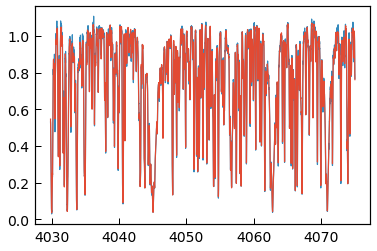

In [6]:
e = 12 # random
plt.plot(np.exp(results.xs[0][e]), np.exp(results.ys[0][e]))
plt.plot(np.exp(results.xs[0][e]), np.exp(results.ys_predicted[0][e]), label='best-fit model')


In [7]:
results = wobble.optimize_order(model, data, 0, niter=100, save_history=True, basename=starname)

100%|██████████| 100/100 [00:27<00:00,  3.67it/s]


saving optimization history to 51peg_o0_history.hdf5


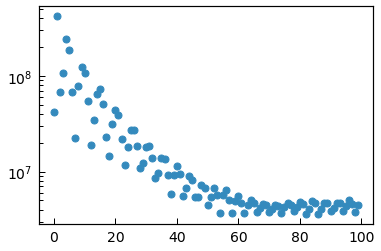

In [8]:
history = wobble.History(model, data, 0, 100, filename=starname+'_o0_history.hdf5')
plt.scatter(np.arange(len(history.nll_history)), history.nll_history)
ax = plt.gca()
ax.set_yscale('log')

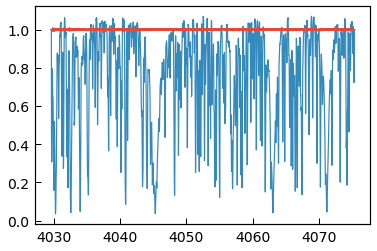

In [9]:
plt.plot(np.exp(results.star_template_xs[0]), np.exp(results.star_template_ys[0]))
plt.plot(np.exp(results.tellurics_template_xs[0]), np.exp(results.tellurics_template_ys[0]))

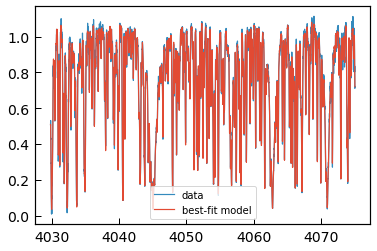

In [10]:
plt.plot(np.exp(results.xs[0][0]), np.exp(results.ys[0][0]), label='data')
plt.plot(np.exp(results.xs[0][0]), np.exp(results.ys_predicted[0][0]), label='best-fit model')
plt.legend()

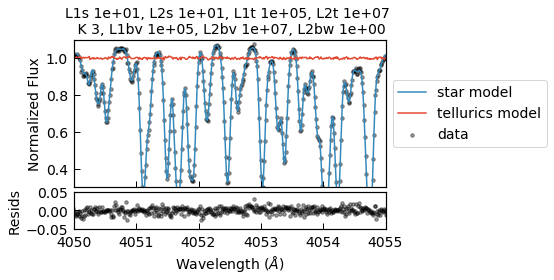

In [24]:
e = 12 # random
fig, (ax, ax2) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 1]})
ax.plot(np.exp(results.xs[0][e]), np.exp(results.star_ys_predicted[0][e]), label='star model', lw=1.5)
ax.plot(np.exp(results.xs[0][e]), np.exp(results.tellurics_ys_predicted[0][e]), label='tellurics model', lw=1.5)
ax.scatter(np.exp(results.xs[0][e]), np.exp(results.ys[0][e]), marker=".", alpha=0.4, c='k', label='data')
ax.set_xlim([4050, 4055])
ax.set_ylim([0.3, 1.1])
ax.set_xticklabels([])
ax.set_ylabel('Normalized Flux', fontsize=14)
ax2.scatter(np.exp(results.xs[0][e]), np.exp(results.ys[0][e]) - np.exp(results.ys_predicted[0][e]), marker=".", alpha=0.4, c='k')
ax2.set_xlim([4050, 4055])
ax2.set_ylim([-0.05, 0.05])
ax2.set_xlabel(r'Wavelength ($\AA$)', fontsize=14)
ax2.set_ylabel('Resids', fontsize=14)

# Shrink current axis by 50%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

ax.set_title('L1s {0:.0e}, L2s {1:.0e}, L1t {2:.0e}, L2t {3:.0e} \n K {4}, L1bv {5:.0e}, L2bv {6:.0e}, L2bw {7:.0e}'.format(
    model.components[0].L1_template, model.components[0].L2_template,
    model.components[1].L1_template, model.components[1].L2_template,
    model.components[1].K, model.components[1].L1_basis_vectors, 
    model.components[1].L2_basis_vectors, model.components[1].L2_basis_weights),
    fontsize=14)
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

#### continuum normalization testing

In [11]:
import h5py
order = 0
with h5py.File('data/51peg_e2ds.hdf5') as f:
    xs = np.log(f['xs'][order])
    ys = np.copy(f['data'][order])
    ivars = np.copy(f['ivars'][order])

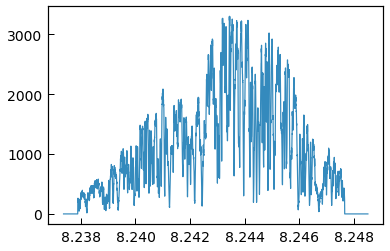

In [12]:
e = 12
plt.plot(xs[e], ys[e])

In [13]:
min_flux = 1.
bad = np.where(ys < min_flux)
ys[bad] = min_flux
ivars[bad] = 0.

In [14]:
ys = np.log(ys)

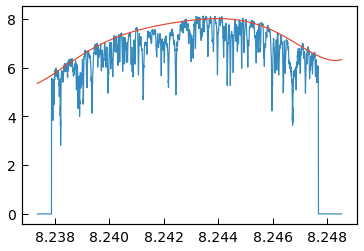

In [15]:
from wobble.utils import fit_continuum
plt.plot(xs[e], ys[e])
nsigma = [0.2,3.0]
#nsigma=[2.0,2.0]
plt.plot(xs[e], fit_continuum(xs[e], ys[e], ivars[e], nsigma=nsigma, order=6))

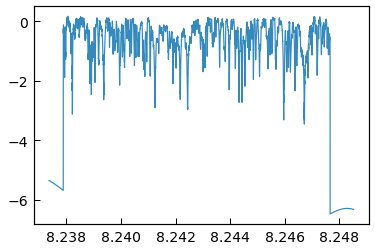

In [16]:
ycs = ys[e] - fit_continuum(xs[e], ys[e], ivars[e], nsigma=nsigma, order=6)
plt.plot(xs[e], ycs)

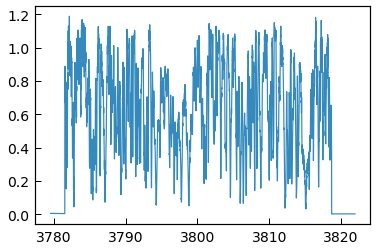

In [17]:
plt.plot(np.exp(xs[e]), np.exp(ycs))